In [0]:
import random
from matplotlib import pyplot as plt

# Will the prisoners survive?
Let's say we have some prisoners being held in a prison who are on a death row. One fine day the warden of the prison wanted to have some fun with the prisoners. The warden proposes a challenge to the prisoners and it goes as follows:

*   There are n number of prisoners numbered from 1 to n taking part in thechallenge, there are n cards also numbered from 1 to n.
*   Now every prisoner walks forwards and picks up a card.
*   If the number of the card matches the number of the prisoner, that prisoner is deemed successful.
*   And if the card is not, he gets to pick a card again.
*   He can pick up a maximum of n/2 cards, if he manages to find his number he is successful, otherwise he is not.

Now the warden doesn't really want the prisoners to win the challenge, so he puts forward the following condition:
*   If all the prisoners manage to be successful they all get to live.
*   But even if one of them fails to be successful, everyone dies!


Let us simulate the challenge proposed by the warden.
We define a simple simulate funtion that takes n as the total number of runs i.e. The number of times we wish to run the challenge.
The second argument it takes is the number of prisoners. 

# First Approach:

Pretty straight-forward approach would be to just call the prisoners one by one and let them choose random cards and catagorize them as successful or unsuccessful.

In [0]:
def simulate(n, prisoners):
    numbers = list(range(1, prisoners + 1))
    cases = []
    ratio = []
    for run in range(1, n + 1):
        random.shuffle(numbers)
        # print(numbers)    #The random list of cards
        successful = 0
        unsuccessful = 0
        for prisoner_number in range(1, prisoners + 1):
            choice = prisoner_number

            for j in range(1, prisoners // 2 + 1):
                x = random.choice(numbers)
                if x == choice:
                    successful+=1
                    break
            else:
                unsuccessful += 1
        #  print(f"Trial {run} successful: {successful}   Unsuccessfull:{unsuccessful}")
        cases.append((successful, unsuccessful))
        ratio.append(successful / prisoners)
    return cases, ratio


In [0]:
# Running for some cases to find the overall success probability: 
def sample_cases(case, simulate_func):
    p_list = []
    p_avg = []
    for _ in range(case):
        ans, ratios = simulate_func(total_runs, prisoners)
        # print(ans)
        
        # Uncomment/Comment the line below for that sweet data.
        # print("Success ratios: ", ratios)
        
        
        ones = ratios.count(1)
        # print(ones)
        p = ones / total_runs
        p_list.append(p)
        pav = sum(p_list)/(len(p_list))
        p_avg.append(pav)
    return p_list, p_avg

Probability of Prisoners Surviving:  0.0


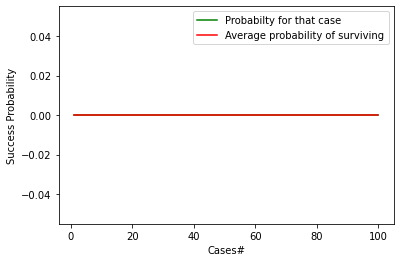

In [33]:
# Tweak these parameters

value = 20    # Total prisoners
case = 100     # Sample cases


prisoners = value
total_runs = value
p_list, p_avg = sample_cases(case, simulate)
# print(p_list)
# print(p_avg)

print("Probability of Prisoners Surviving: ", sum(p_list)/len(p_list))
x = range(1, len(p_list)+1)
y = p_list
plt.plot(x, y, color="green", label='Probabilty for that case')
plt.plot(x, p_avg, color="red", label='Average probability of surviving')
plt.ylabel('Success Probability')
plt.xlabel('Cases#')
plt.legend()
plt.show()

Hmmm....
That's quite odd.
Did we do something wrong?

Actually not, as expected the probability of **All the prisoners** surviving is very very low.
Even if one of the prisoner fails to find his card, all of the prisoners die. Hence no one survives and as we look at the Success Ratios, none of them is equal to 1, i.e. Everyone surviving.

# Did the warden win?
So, prisoners were like: "Then what are we here for? Just to suffer" (meme music plays)

---

Is there no way of winning the challenge and surviving?
Actually, there is. Let's look at the following approach.

# Approach 2 (Better):
There are n number of prisoners and they are numbered from 1 to n.
There is also a list of same numbers but is shuffled. 
*    Lets say every prisoner starting from 1 goes and picks up the card that is located at the same index as their number.
*    If the card picked has the same number as of the prisoner, he is successful.
*    If not, he picks another card, **but this time the next card he picks up is the card that was mentioned in the previous card he picked**. If he finds the card he is successful otherwise he picks the next card which is mentioned on the current card. He can repeat this card picking process atmost n/2 times.
*    If he runs out of his chances to find the card. He is deemed unsuccessful.


If everyone manage to find the card. They all get to live.
If anyone of them fails. They all die.


In [0]:
def simulate_better(n, prisoners):
    numbers = list(range(1, prisoners + 1))
    cases = []
    ratio = []
    for run in range(1, n + 1):
        random.shuffle(numbers)
        # print(numbers)      #The random list
        successful = 0
        unsuccessful = 0
        for prisoner_number in range(1, prisoners + 1):
            choice = prisoner_number
            for j in range(1, prisoners // 2 + 1):
                if numbers[choice - 1] == prisoner_number:
                    successful += 1
                    break
                choice = numbers[choice - 1]
            else:
                unsuccessful += 1
        cases.append((successful, unsuccessful))
        ratio.append(successful / prisoners)
    return cases, ratio


# Tweak these parameters:

Probability of Prisoners Surviving:  0.33899999999999997


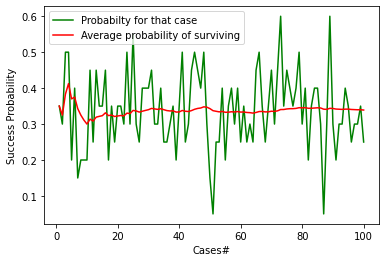

In [36]:
# Tweak these parameters

value = 20    # Total prisoners
case = 100     # Sample cases

prisoners = value
total_runs = value
p_list, p_avg = sample_cases(case, simulate_better)
# print(p_list)
# print(p_avg)

print("Probability of Prisoners Surviving: ", sum(p_list)/len(p_list))
x = range(1, len(p_list)+1)
y = p_list
plt.plot(x, y, color="green", label='Probabilty for that case')
plt.plot(x, p_avg, color="red", label='Average probability of surviving')
plt.ylabel('Success Probability')
plt.xlabel('Cases#')
plt.legend()
plt.show()

#  Hmmm. That's quite surprising isn't it?
The probability of prisoners surviving jumped from 0 to 0.33 or 33% or (1/3) with just a minor change in the strategy of choosing cards.


The cards being random, the probabilty do show a zigzag pattern, keeping the average probaility same i.e. 0.32. For any number of cases this probability sticks around 0.32. (Try it).